In [1]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Загружаем обработанный в прошлой ЛР датасет

In [2]:
ds = pd.read_csv('../data/out.csv')

In [3]:
ds.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [4]:
X = ds.drop("success", axis=1).to_numpy()
y = ds["success"].to_numpy()

print(X.shape)
print(y.shape)

type(X)

(297, 2)
(297,)


numpy.ndarray

In [5]:
print(X[:5])

[[23.65780072 18.8599168 ]
 [22.57372914 17.96922325]
 [32.55342397 29.46365141]
 [ 6.71803504 25.70466547]
 [14.40191857 16.77085649]]


Разбиваю на обучающую и тестовую выборку, после чего нормализую данные

In [6]:
from sklearn.preprocessing import normalize

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1, shuffle = True)

train_X = normalize(train_X, norm="max", axis=0)
test_X = normalize(test_X, norm="max", axis=0)

print(train_X.shape)
print(train_y.shape)

print(test_X.shape)
print(test_y.shape)

(237, 2)
(237,)
(60, 2)
(60,)


In [7]:
from ML import *

In [8]:
gscv = GridSearchCV(Pipeline([('knn', kNN())]), {'knn__k' : [1, 3, 5, 7, 9]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'knn__k': 5}
Best acc: 0.9282801418439716


Accuracy: 0.9166666666666666
Recall: 1.0
Precision: 0.8648648648648649


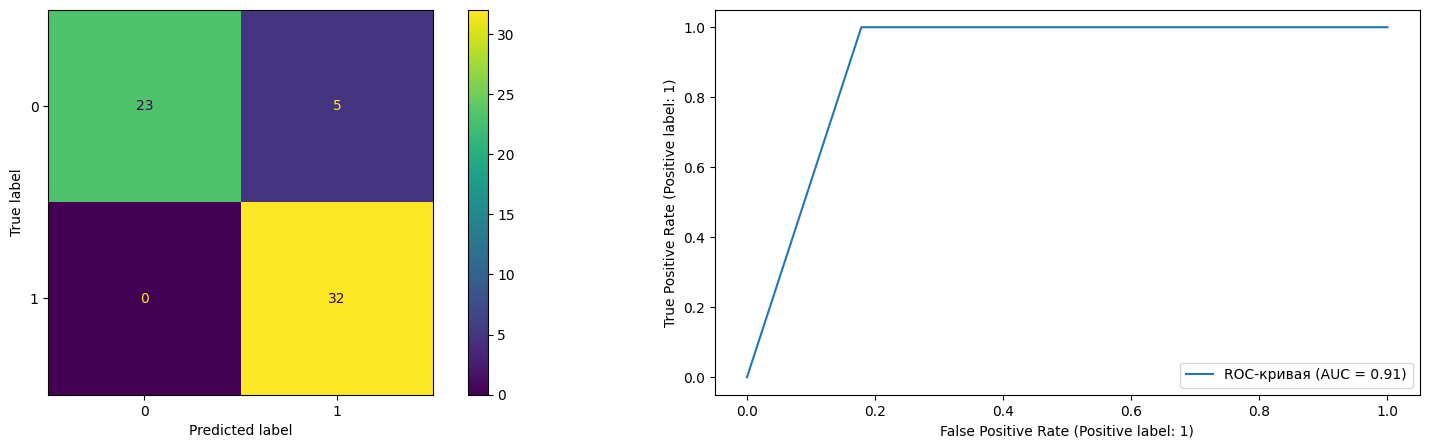

In [9]:
knn_best = gscv.best_estimator_
scores(knn_best, test_X, test_y)

In [10]:
f = open("kNN.pkl", "wb")
pickle.dump(gscv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)
f.close()

[kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) из scikit-learn

In [11]:
from sklearn.neighbors import KNeighborsClassifier

gscv = GridSearchCV(Pipeline([('knn', KNeighborsClassifier())]), {'knn__n_neighbors' : [1, 3, 5, 7, 9]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'knn__n_neighbors': 5}
Best acc: 0.9282801418439716


Accuracy: 0.9166666666666666
Recall: 1.0
Precision: 0.8648648648648649


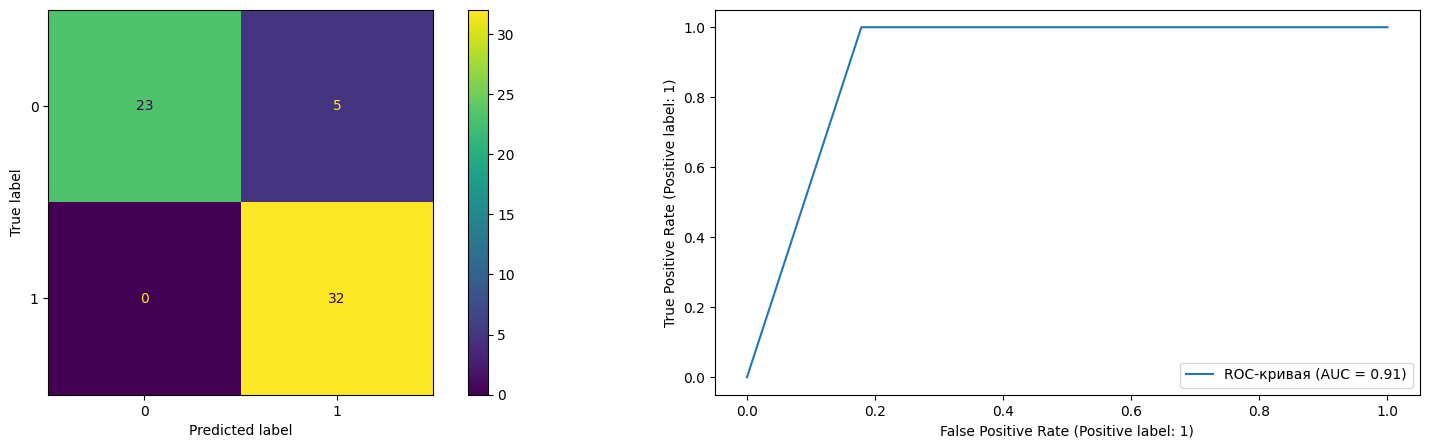

In [12]:
knn_best = gscv.best_estimator_
scores(knn_best, test_X, test_y)

In [13]:
gscv = GridSearchCV(Pipeline([("logreg", LogisticRegression(nin=train_X.shape[1]))]),
                    {"logreg__epoches" : [1, 2, 4],
                     "logreg__batch_size" : [5, 10, 20],
                     "logreg__SGD_step" : [0.01, 0.05, 0.1]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'logreg__SGD_step': 0.01, 'logreg__batch_size': 5, 'logreg__epoches': 1}
Best acc: 0.8479609929078015


Accuracy: 0.8333333333333334
Recall: 0.78125
Precision: 0.8928571428571429


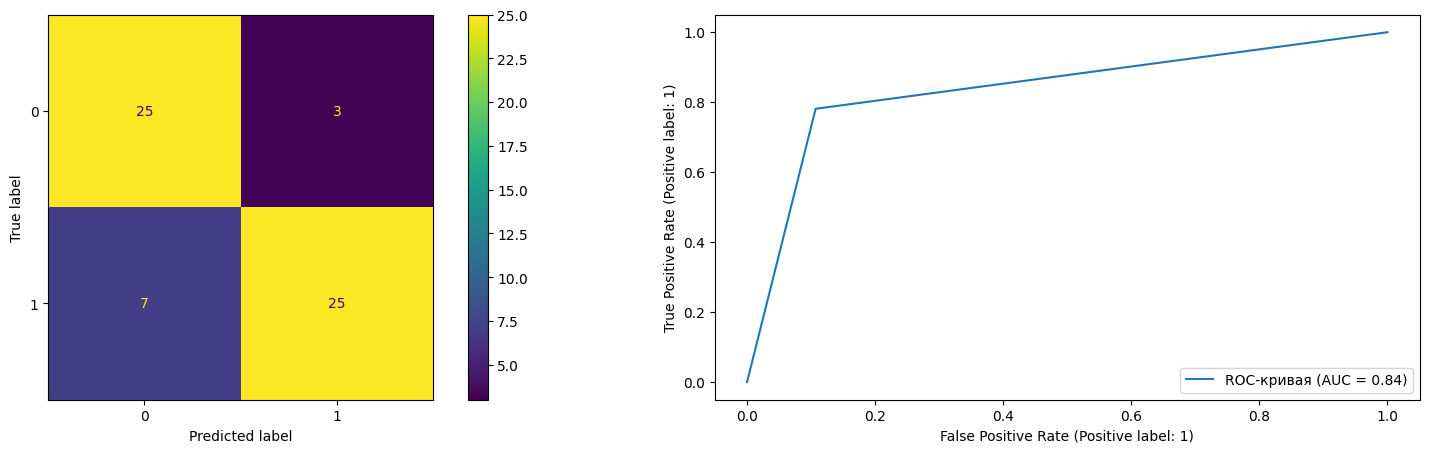

In [14]:
logreg_best = gscv.best_estimator_
scores(logreg_best, test_X, test_y)

In [16]:
rscv = RandomizedSearchCV(Pipeline([("logreg", LogisticRegression(nin=train_X.shape[1]))]),
                    {"logreg__epoches" : [1, 2, 4],
                     "logreg__batch_size" : [5, 10, 20],
                     "logreg__SGD_step" : [0.01, 0.05, 0.1]})
rscv.fit(train_X, train_y)
best(rscv)

Best params: {'logreg__epoches': 4, 'logreg__batch_size': 10, 'logreg__SGD_step': 0.01}
Best acc: 0.8057624113475178


Accuracy: 0.8166666666666667
Recall: 0.65625
Precision: 1.0


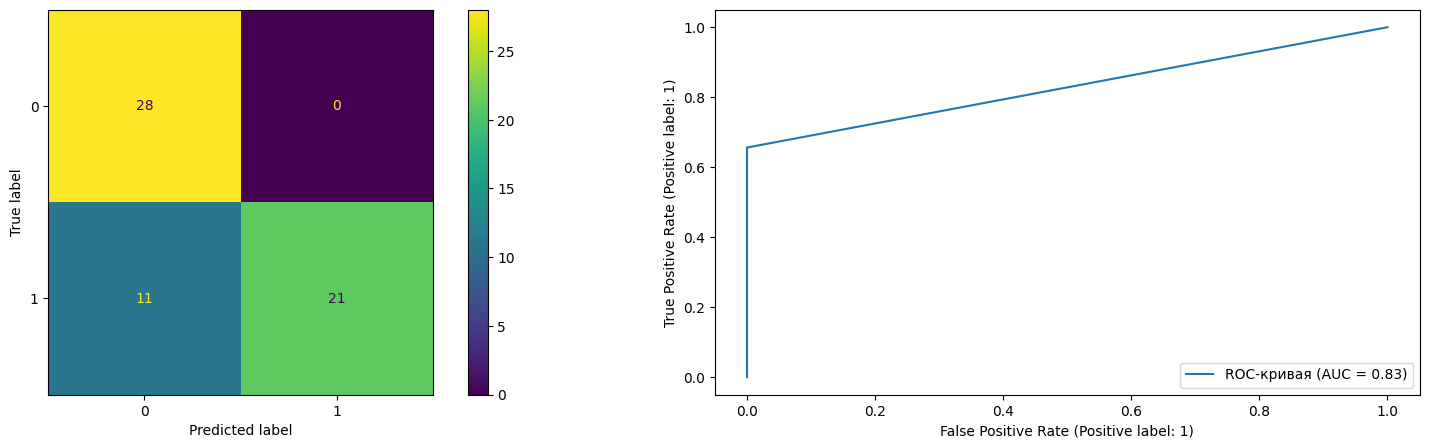

In [17]:
logreg_best = rscv.best_estimator_
scores(logreg_best, test_X, test_y)

In [18]:
f = open("logreg.pkl", "wb")
pickle.dump(logreg_best, f, pickle.HIGHEST_PROTOCOL)
f.close()

[Логистическая регрессия](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из scikit-learn

In [19]:
from sklearn.linear_model import LogisticRegression

gscv = GridSearchCV(Pipeline([("logreg", LogisticRegression())]),
                    {"logreg__penalty" : ["l2", "none"],
                     "logreg__solver" : ["newton-cg", "lbfgs"],
                     "logreg__max_iter" : [1000, 10000]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'logreg__max_iter': 1000, 'logreg__penalty': 'l2', 'logreg__solver': 'newton-cg'}
Best acc: 0.8820035460992907


Accuracy: 0.85
Recall: 0.875
Precision: 0.8484848484848485


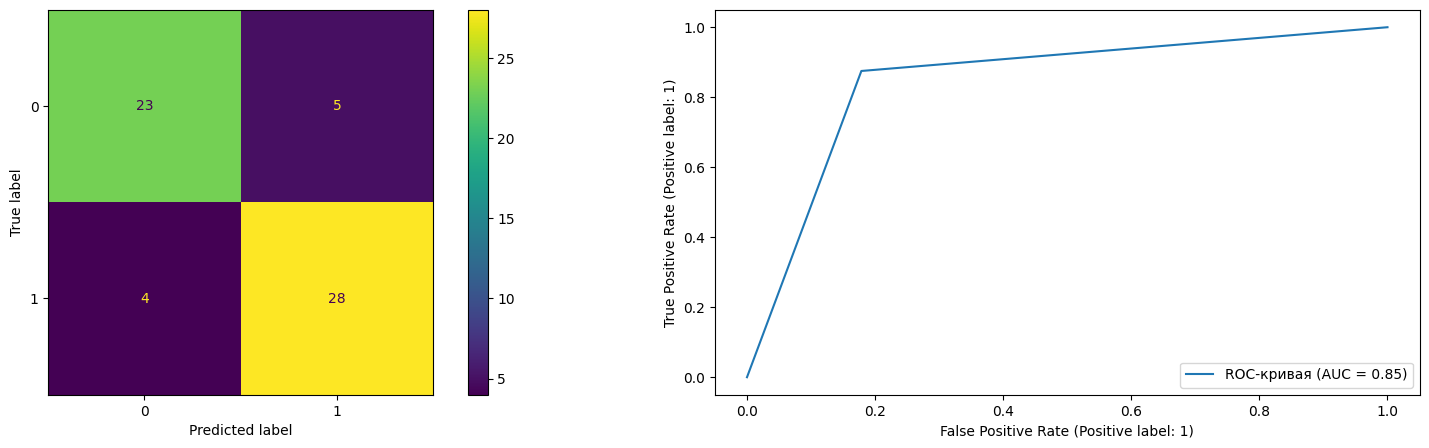

In [20]:
logreg_best = gscv.best_estimator_
scores(logreg_best, test_X, test_y)

In [21]:
gscv = GridSearchCV(Pipeline([("SVM", SVM(nin=train_X.shape[1]))]),
                    {"SVM__epoches" : [1, 2, 4],
                     "SVM__batch_size" : [5, 10, 20],
                     "SVM__SGD_step" : [0.01, 0.05, 0.1],
                     "SVM__alpha" : [1.0, 0.1, 0.01, 0.0]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'SVM__SGD_step': 0.05, 'SVM__alpha': 0.01, 'SVM__batch_size': 20, 'SVM__epoches': 4}
Best acc: 0.8649822695035461


Accuracy: 0.8333333333333334
Recall: 0.78125
Precision: 0.8928571428571429


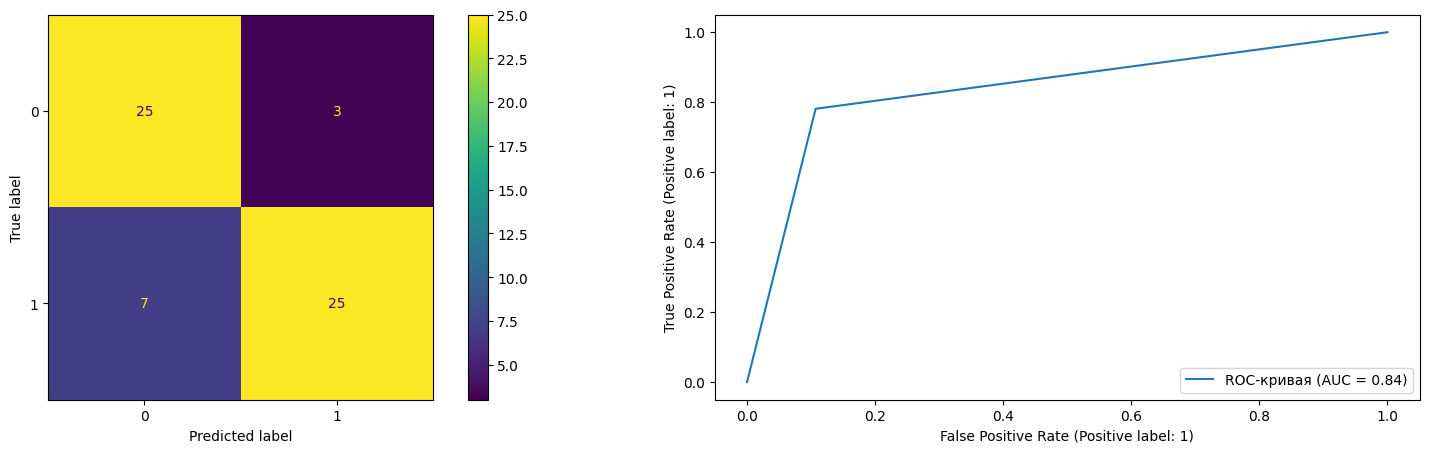

In [22]:
SVM_best = gscv.best_estimator_
scores(SVM_best, test_X, test_y)

Функция для отрисовки разделяющей прямой

In [23]:
def drawDataAndLine(W, b, X, y):
    n = X.shape[1]
    fig, ax = plt.subplots(n, n)
    for i in range(n):
        for j in range(n):
            ax[i][j].set_xlim(0.0, 1.0)
            ax[i][j].set_ylim(0.0, 1.0)
            if i==j:
                continue
            x_list0 = []
            y_list0 = []

            x_list1 = []
            y_list1 = []
            for (ii, elem) in enumerate(X):
                if (y[ii] == 1):
                    x_list1.append(elem[i])
                    y_list1.append(elem[j])
                elif (y[ii] == 0):
                    x_list0.append(elem[i])
                    y_list0.append(elem[j])
            ax[i][j].scatter(x_list1, y_list1, s = 10)
            ax[i][j].scatter(x_list0, y_list0, s = 10)

            line_x = np.linspace(0.0, 1.0, 100)
            line_y = -(W[i] * line_x + b) / W[j]
            ax[i][j].plot(line_x, line_y, "-r")
    fig.set_size_inches(fig.get_size_inches() * n)
    plt.tight_layout()
    plt.show()


In [24]:
f = open("SVM.pkl", "wb")
pickle.dump(SVM_best, f, pickle.HIGHEST_PROTOCOL)
f.close()

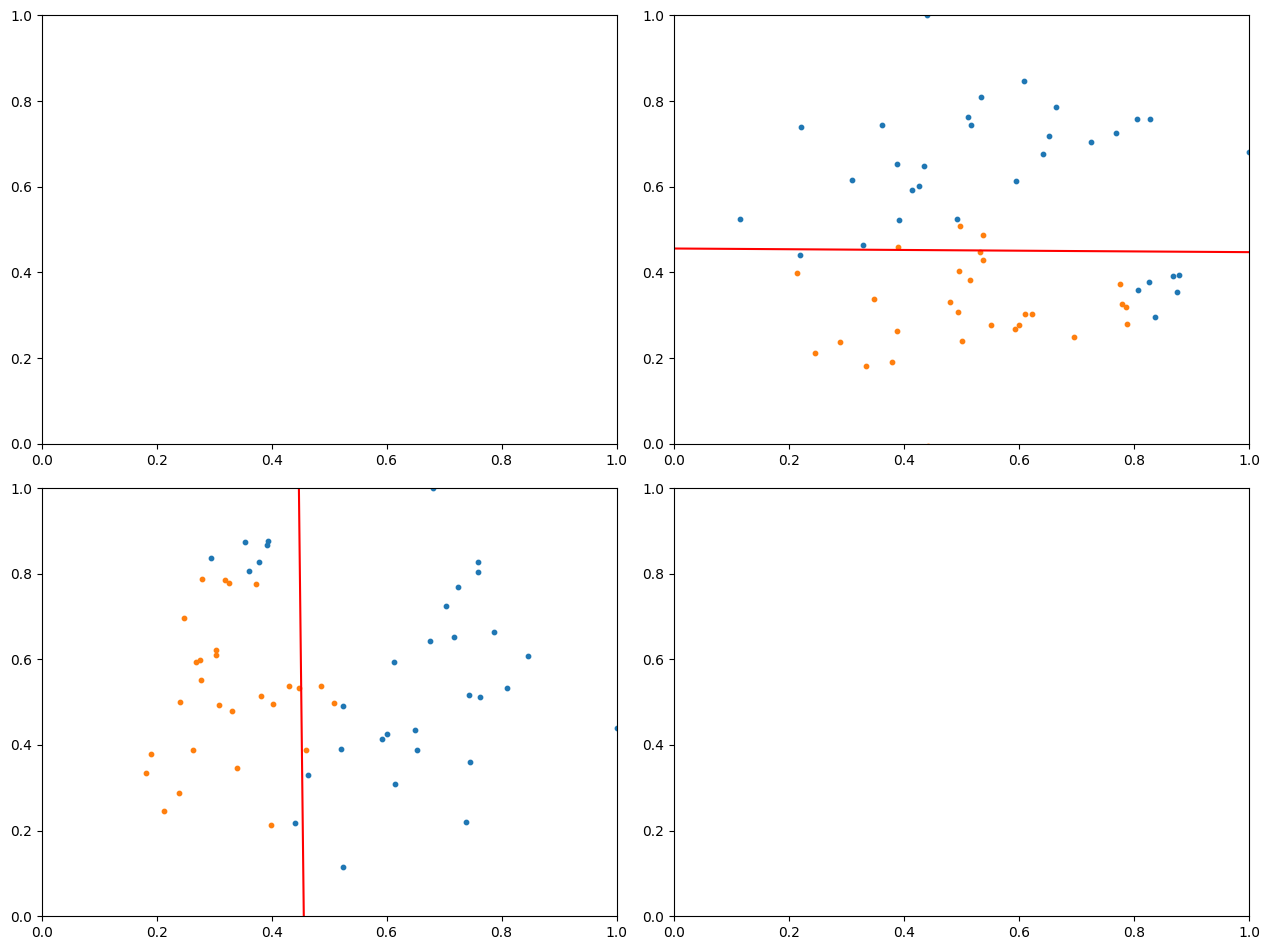

In [25]:
SVM_params = SVM_best[0].getW()
drawDataAndLine(SVM_params[0][:2], SVM_params[0][-1], test_X, test_y)

In [26]:
rscv = RandomizedSearchCV(Pipeline([("SVM", SVM(nin=train_X.shape[1]))]),
                    {"SVM__epoches" : [1, 2, 4],
                     "SVM__batch_size" : [5, 10, 20],
                     "SVM__SGD_step" : [0.01, 0.05, 0.1],
                     "SVM__alpha" : [1.0, 0.1, 0.01, 0.0]})
rscv.fit(train_X, train_y)
best(rscv)

Best params: {'SVM__epoches': 4, 'SVM__batch_size': 10, 'SVM__alpha': 0.01, 'SVM__SGD_step': 0.05}
Best acc: 0.8608156028368794


Accuracy: 0.85
Recall: 0.75
Precision: 0.96


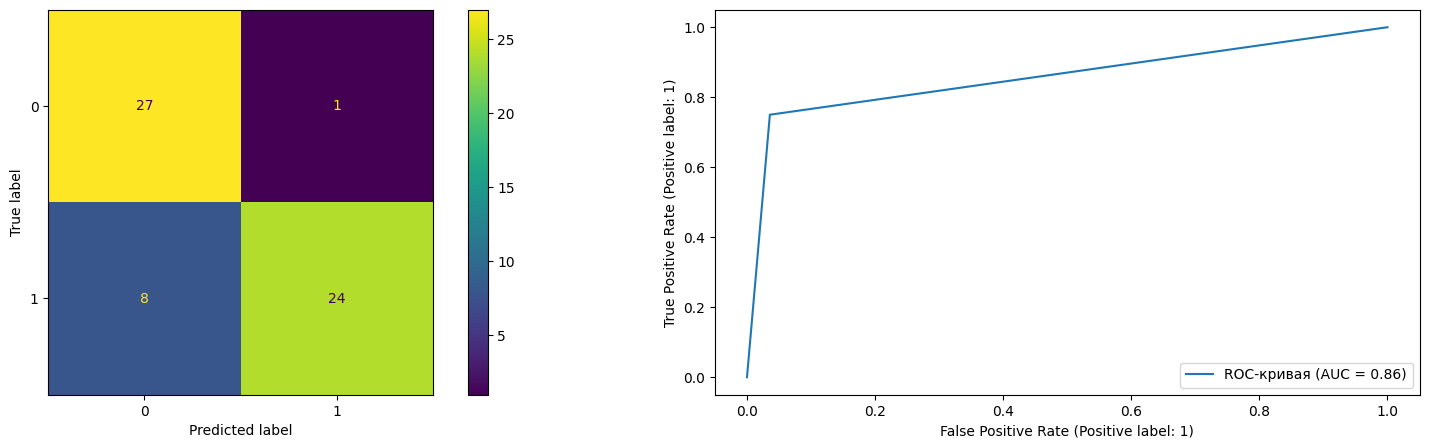

In [27]:
SVM_best = rscv.best_estimator_
scores(SVM_best, test_X, test_y)

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) из scikit-learn

In [28]:
from sklearn.svm import LinearSVC

gscv = GridSearchCV(Pipeline([("svc", LinearSVC())]),
                    {"svc__loss" : ["hinge", "squared_hinge"],
                     "svc__max_iter" : [1e5, 1e6]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'svc__loss': 'hinge', 'svc__max_iter': 100000.0}
Best acc: 0.8906028368794325


Accuracy: 0.85
Recall: 0.8125
Precision: 0.896551724137931


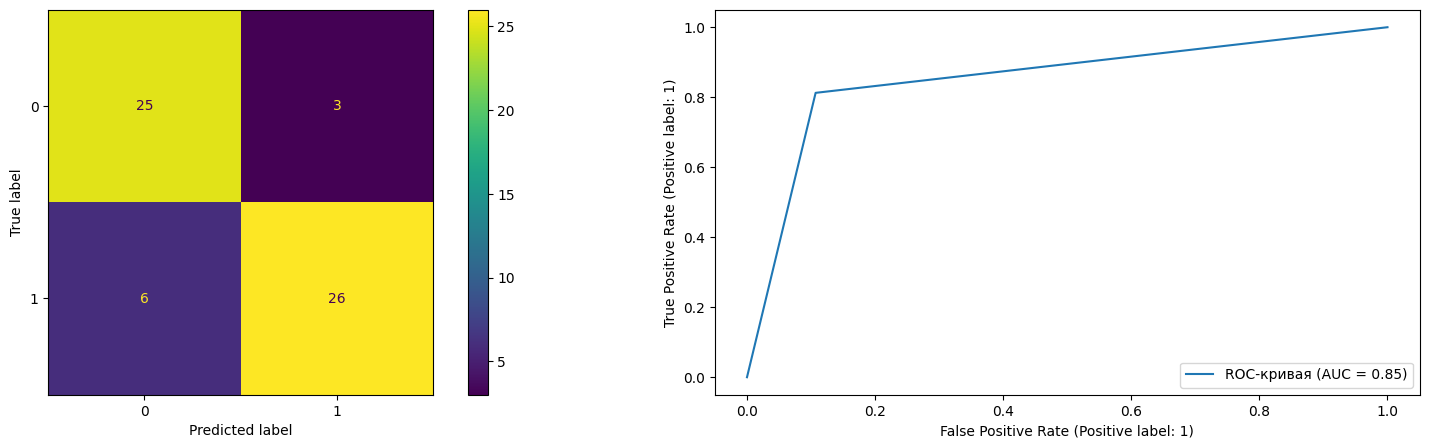

In [29]:
SVM_best = gscv.best_estimator_
scores(SVM_best, test_X, test_y)

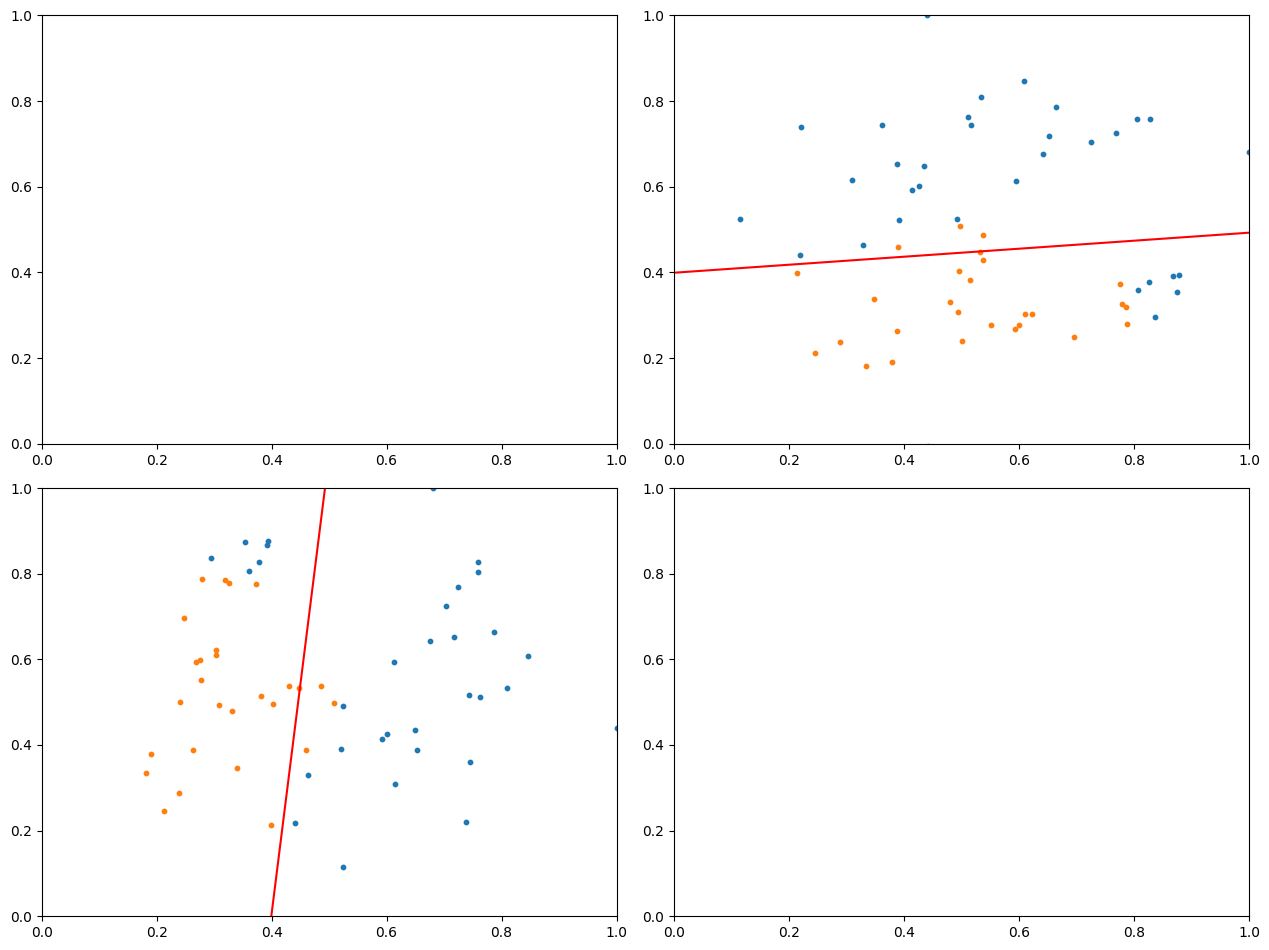

In [30]:
drawDataAndLine(SVM_best[0].coef_[0], SVM_best[0].intercept_[0], test_X, test_y)

Accuracy: 0.8833333333333333
Recall: 0.96875
Precision: 0.8378378378378378


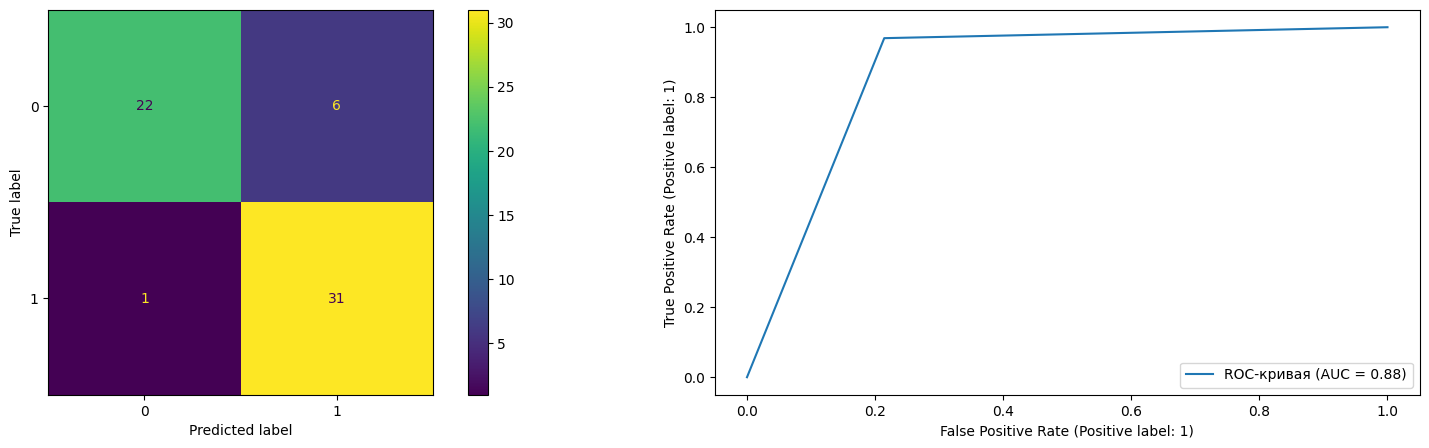

In [31]:
NB = Pipeline([("NB", NaiveBayes())])
NB.fit(train_X, train_y)
scores(NB, test_X, test_y)

In [32]:
f = open("NB.pkl", "wb")
pickle.dump(NB, f, pickle.HIGHEST_PROTOCOL)
f.close()

[Наивный байесовский классификатор](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) из scikit.learn

Accuracy: 0.85
Recall: 0.84375
Precision: 0.8709677419354839


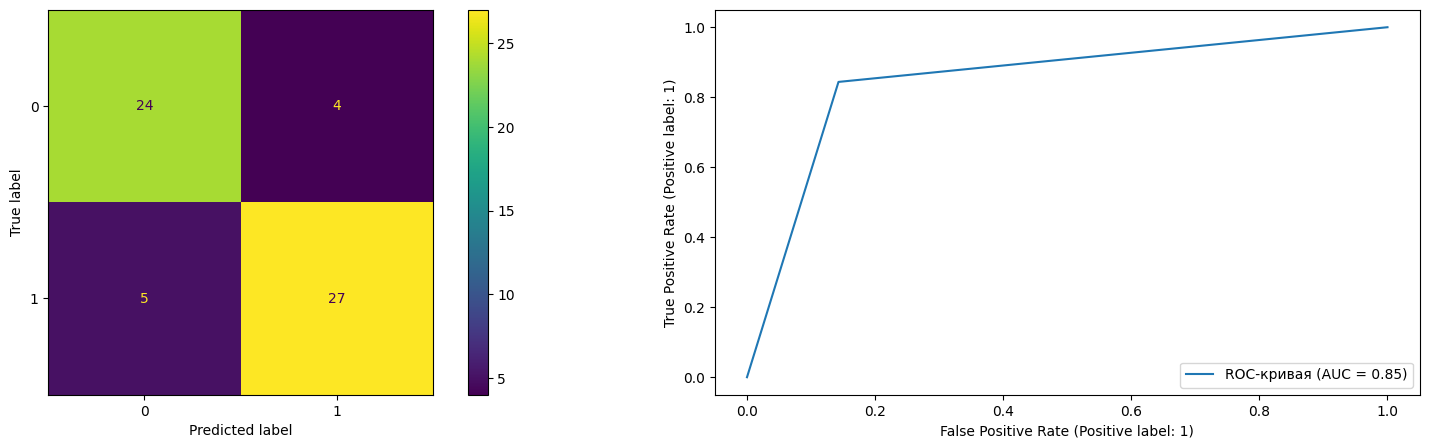

In [33]:
from sklearn.naive_bayes import GaussianNB

NB = Pipeline([("NB", GaussianNB())])
NB.fit(train_X, train_y)
scores(NB, test_X, test_y)